Al aplicar PCA al dataset de cancer y observar la gráfica de las dos componentes principales, si en lugar de escalar los datos con StandardScaler lo hacemos con Normalizer. El color predominante de la gráfica es

Text(0.5, 1.05, 'pca_components_cancer')

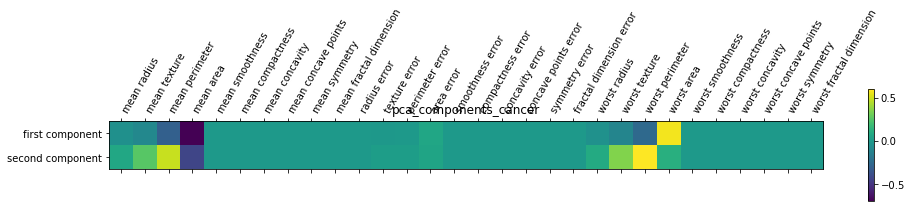

In [1]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
#Escalamos los datos con Normalizer
scaler = Normalizer()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# Mantenemos las primeras 2 componentes principales de los datos
pca = PCA(n_components=2)
# Ajustamos PCA al dataset de cancer ya escalado
pca.fit(X_scaled)
# Transformamos los datos en las primeras dos componentes principales
X_pca = pca.transform(X_scaled)

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left');
plt.title("pca_components_cancer")

Al usar NMF en el dataset de fotos de rostros de personas con semilla aleatoria igual a 0 y con 40 componentes, al imprimir las fotos más cercanas a la componente 29 ¿Hacia que lado de la pantalla observan los rostros? ¿Cuál es un rostro conocido entre ellos

/home/rubas22/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/home/rubas22/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


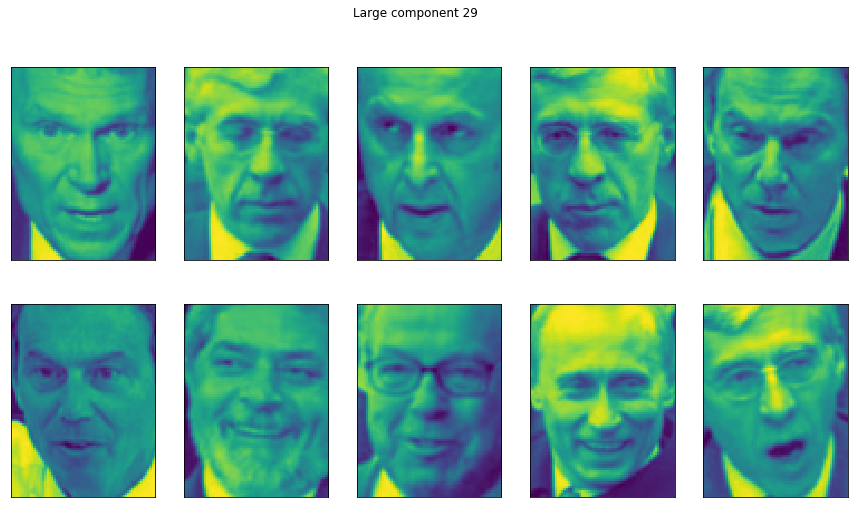

In [2]:
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255.

# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# Decimos cuantas componentes queremos y damos la semilla aleatoria
nmf = NMF(n_components=40, random_state=0)
# Decimos con respecto a que conjunto hacer el ajuste
nmf.fit(X_train)
# Transformamos los datos de entrenamiento y prueba
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

compn = 29
# Imprimimos las fotos más cercanas a la componente
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 29")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

Con el Dataset fetch_olivetti_faces y aplicando PCA con 20 componentes y usando KNeighborsClassifier a los datos ¿Cuál es el porcentaje de acierto [[1]]?

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces 

people = fetch_olivetti_faces ()
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255.

# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)


# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

pca = PCA(n_components=20, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/rubas22/scikit_learn_data


0.95

Si n es el número de una componente, imprimiendo las 10 caras más cercanas a la componente n, __ tiene más personas con lentes

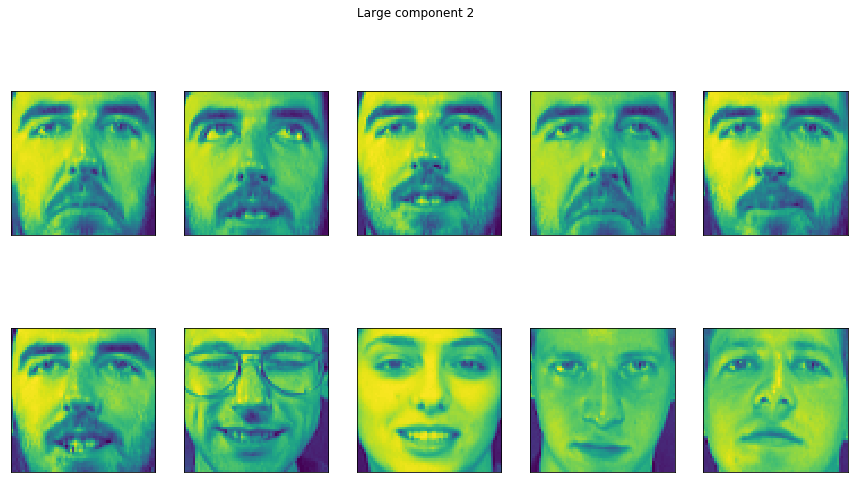

In [9]:
compn = 2
# Imprimimos las fotos más cercanas a la componente
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 2")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

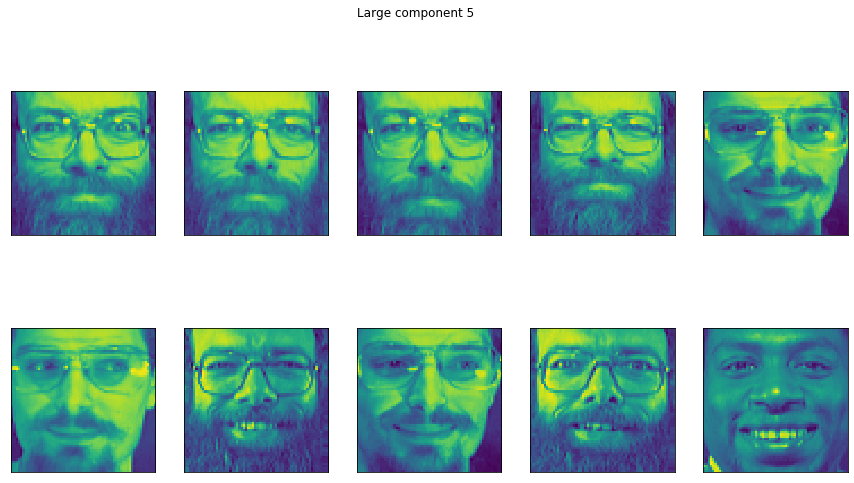

In [10]:
compn = 5
# Imprimimos las fotos más cercanas a la componente
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 5")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

Aplicando NMF con 20 componentes, semilla aleatoria 0 y usando KNeighborsClassifier a los datos, el porcentaje de acierto es [[1]]

In [7]:
nmf = NMF(n_components=20, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_nmf, y_train)
knn.score(X_test_nmf, y_test)

/home/rubas22/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/home/rubas22/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


0.87